# Assignment 3
### General Instructions
  + The Python standard library is not enough to do solve these questions. You will need to import appropriate libraries for each task. Generally, you might import and use any library you wish unless otherwise stated. 
  + Where detail instructions like variable or function names, required libraries, and etc are not given by the question, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + When you are required to explain or answer in text format open a Markdown cell and enter your answer in it.
  + Do not remove or modify the original cells provided by the instructor.
  + Comment your code whenever needed using # sign at the beginning of the row.
  + Do not hesitate to communicate your questions to the TAs or instructors. Good luck! 

In [1]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## Question 1 <span style="color:red">(50 points)</span>
### Binary Classification
  1. Here, we will use the `ziptrain.csv` and `ziptest.csv` datasets from Session07. Upload them here as two separate datasets. 
  2. Explore the data in order to understand it. 
  3. From `ziptrain` dataset select only the rows corresponding to digits $2$ and $7$ and save them in a new dataset called `binar_train`. Do the same thing in `ziptest` and call it `binar_test`. 
  4. Project `binar_train` onto the first two principal components and make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. Based on the plot do you think that these two digits can be separated well using only two PCs?
  5. Fit a logistic regression, in the new space,to separate digits $2$ and $7$. Evaluate the trainded model on `binar_test` using 
    + recall,
    + precision,
    + accuracy, and 
    + appropriate F-measure.
  6. Build a confusion matrix for your predictions.
  7. Now, instead of using only $2$ principle components, project `binar_train` onto the first $m=2, 3, ...$ principal components (one $m$ at a time), and train a logistic classifier each time. Using `binar_test` for evaluation, choose an $m$ that gives the best classification. 
### Multi-Classification <span style="color:green">(BONUS: 25 points)</span>
  8. Project `ziptrain` (**not `binar_train`**) onto first two principal components and make a scatterplot to confirm wheather or not only two principal components separates **all** digits properly.
  9. Use linear discriminant on `ziptrain` over the $256$ original pixels and build the confusion matrix for the trained model over `ziptrain` (**not `ziptest`**).
  10. Use linear disciminant in spaces of $m=2,3,...$ PCs to train your classifier. Choose the $m$ that gives the best classification result evaluated by the **precision** of predictions over `ziptest` dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#1.Here, we will use the ziptrain.csv and ziptest.csv datasets from Session07. Upload them here as two separate datasets
path = 'data/'
#filename = path + 'ziptrain.csv'
ziptrain_data = np.loadtxt("data/ziptrain.csv")
print(ziptrain_data.shape)
ziptrain_data[0:5,0:5]

(7291, 257)


array([[ 6.   , -1.   , -1.   , -1.   , -1.   ],
       [ 5.   , -1.   , -1.   , -1.   , -0.813],
       [ 4.   , -1.   , -1.   , -1.   , -1.   ],
       [ 7.   , -1.   , -1.   , -1.   , -1.   ],
       [ 3.   , -1.   , -1.   , -1.   , -1.   ]])

In [4]:
path = 'data/'
#filename = path + 'ziptest.csv'
ziptest_data = np.loadtxt("data/ziptest.csv")
print(ziptest_data.shape)
ziptest_data[0:5,0:5]

(2007, 257)


array([[ 9.   , -1.   , -1.   , -1.   , -1.   ],
       [ 6.   , -1.   , -1.   , -1.   , -1.   ],
       [ 3.   , -1.   , -1.   , -1.   , -0.593],
       [ 6.   , -1.   , -1.   , -1.   , -1.   ],
       [ 6.   , -1.   , -1.   , -1.   , -1.   ]])

2.Explore the data in order to understand it
The data sets contains pixel data for displaying digits.
The first column is the digit, the remaining 256 are pixes of a 16X16 grayscale image

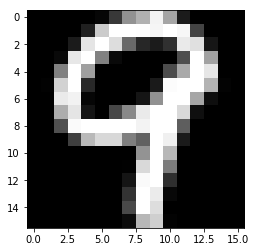

In [5]:
plt.imshow(ziptest_data[0, 1:].reshape(16,16), "gray")

In [6]:
ziptest_data[1,0] == 6

True

In [7]:
#3.From ziptrain dataset select only the rows corresponding to digits  2  and  7  and save them in a new dataset 
# called binar_train. Do the same thing in ziptest and call it binar_test.

#binar_train = np.concatenate((ziptest_data[ziptest_data[:, 0] == 2], ziptest_data[ziptest_data[:, 0] == 7]), axis=0)
zipdata2 = ziptrain_data[ziptrain_data[:, 0] == 2]
zipdata7 = ziptrain_data[ziptrain_data[:, 0] == 7]
print(zipdata2.shape)
binar_train = np.vstack([zipdata2, zipdata7])
print(binar_train.shape)
binar_train[730:735,0:5]

(731, 257)
(1376, 257)


array([[ 2.   , -1.   , -1.   , -1.   , -1.   ],
       [ 7.   , -1.   , -1.   , -1.   , -1.   ],
       [ 7.   , -1.   , -1.   , -1.   , -1.   ],
       [ 7.   , -1.   , -1.   , -1.   , -1.   ],
       [ 7.   , -1.   , -1.   , -1.   , -0.929]])

In [8]:
zipdata2 = ziptest_data[ziptest_data[:, 0] == 2]
zipdata7 = ziptest_data[ziptest_data[:, 0] == 7]
print(zipdata2.shape)
binar_test = np.vstack([zipdata2, zipdata7])
#instead of stack try to mix
print(binar_test.shape)
binar_test[195:200,0:5]

(198, 257)
(345, 257)


array([[ 2.   , -0.281,  1.   , -0.123, -1.   ],
       [ 2.   , -1.   , -1.   , -1.   , -1.   ],
       [ 2.   , -1.   , -1.   , -1.   , -0.98 ],
       [ 7.   , -1.   , -0.99 ,  0.7  ,  0.283],
       [ 7.   , -1.   , -1.   , -0.862,  0.   ]])

In [9]:
#4.Project binar_train onto the first two principal components and make a scatterplot of the data in the new space 
#(two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# remove the first column (image label)
pca.fit(binar_train[:, 1:])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pca_trans = pca.transform(binar_train[:,1:])
pd.DataFrame(pca_trans).head()

,0,1
0,6.170833,1.125084
1,-3.317885,-1.851944
2,3.073119,-4.297046
3,4.008856,0.497933
4,6.956282,-5.635834


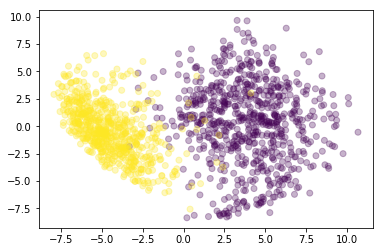

In [11]:
plt.scatter(pca_trans[:,0], pca_trans[:,1], c= binar_train[:,0], alpha=0.3);

(-10, 10)

(-10, 10)

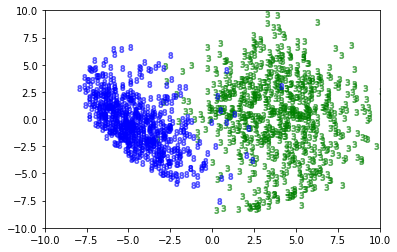

In [12]:
#4.Use a different color (or marker) for each digit.
plt.scatter(pca_trans[binar_train[:,0]==2,0], pca_trans[binar_train[:,0]==2,1], \
            marker='$3$', 
            color='green', alpha = 0.5);

plt.scatter(pca_trans[binar_train[:,0]==7,0], pca_trans[binar_train[:,0]==7,1], \
            marker='$8$', 
            color='blue', alpha = 0.5);

plt.xlim([-10,10])
plt.ylim([-10,10])

In [13]:
#5.Fit a logistic regression, in the new space,to separate digits  2  and  7 . 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
x_train = pca_trans
y_train = (binar_train[:,0] > 4)*1
lr.fit(x_train, y_train)

C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
#Evaluate the trainded model on binar_test using recall,precision,accuracy, and appropriate F-measure.
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
pca.fit(binar_test[:, 1:])
x_test = pca.transform(binar_test[:,1:])
#pd.DataFrame(x_test).head()
y_test = (binar_test[:,0] > 4)*1
y_pred_lr = lr.predict(x_test)
recall = recall_score(y_test, y_pred_lr)
print("The recall value is: ", recall)
precision = precision_score(y_test, y_pred_lr)
print("The precision value is: ", precision)
accuracy = accuracy_score(y_test, y_pred_lr)
print("The accuracy value is: ", accuracy)
fscore = f1_score(y_test, y_pred_lr)
print("The fscore value is: ", fscore)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

The recall value is:  0.9047619047619048
The precision value is:  0.9236111111111112
The accuracy value is:  0.927536231884058
The fscore value is:  0.914089347079038


In [15]:
#6.Build a confusion matrix for your predictions.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_lr))#

[[187  11]
 [ 14 133]]


In [16]:
#7.Now, instead of using only  2  principle components, project binar_train onto the first  𝑚=2,3,...  
#principal components (one  𝑚  at a time), and train a logistic classifier each time. Using binar_test for evaluation, 
#choose an  𝑚  that gives the best classification.
Accuracyscores = np.array([])
F1scores = np.array([])
for m in range(2,10):
    pca_m = PCA(n_components=m)
    pca_m.fit(binar_train[:, 1:])    
    lr_m = LogisticRegression()
    xm_train = pca_m.transform(binar_train[:,1:])
    ym_train = (binar_train[:,0] > 4)*1
    lr_m.fit(xm_train, ym_train)    
    pca_m.fit(binar_test[:, 1:])
    xm_test = pca_m.transform(binar_test[:,1:])
    ym_test = (binar_test[:,0] > 4)*1
    ym_pred_lr = lr_m.predict(xm_test) 
    accuracy_m = accuracy_score(ym_test, ym_pred_lr)
    fscore_m = f1_score(ym_test, ym_pred_lr)
    
    Accuracyscores = np.append(Accuracyscores,accuracy_m) 
    F1scores = np.append(F1scores,fscore_m)
    
print(Accuracyscores)    
print(F1scores)   
    

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[0.92753623 0.92463768 0.93913043 0.92173913 0.86956522 0.87826087
 0.87246377 0.87536232]
[0.91408935 0.9109589  0.92832765 0.90721649 0.84641638 0.85517241
 0.85034014 0.85324232]


Ans:
Comparing the accuracy score and F1score we can see that for m=4 gives best classification

# Multi-Classification (BONUS: 25 points)

In [17]:
#8.Project ziptrain (not binar_train) onto first two principal components and make a scatterplot to confirm wheather or 
# not only two principal components separates all digits properly.
pca = PCA(n_components=2)
pca.fit(ziptrain_data)
pca_trans_ziptrain = pca.transform(ziptrain_data)
pd.DataFrame(pca_trans_ziptrain).head()

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

,0,1
0,4.666392,-1.233592
1,6.467988,1.550482
2,0.500171,2.516791
3,-3.979212,5.500498
4,2.851216,0.002116


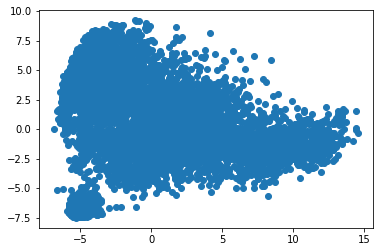

In [18]:
plt.scatter(pca_trans_ziptrain[:,0], pca_trans_ziptrain[:,1]);

Ans:
With 2 principal component we can not separate all digits properly

In [19]:
#9.Use linear discriminant on ziptrain over the  256  original pixels and build the confusion matrix for the trained model over 
#ziptrain (not ziptest).
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
print(ziptrain_data.shape())
#x_train = ziptrain_data.reshape(16,16)
#x_train.head()
#lda.fit(X5,y)

In [20]:
#10.Use linear disciminant in spaces of  𝑚=2,3,...  PCs to train your classifier. Choose the  𝑚  that gives the best classification result evaluated by the precision of predictions over ziptest dataset.

## Question 2 <span style="color:red">(50 points)</span>

The objective of this exercise is to understand the notions of underfitting and overfitting. Using cross-validation on simulated data, we will be able to visualize the two concepts.

##### Synthetic data
1. Generate 100 points equally distanced from -20 to 20 and save them in a `numpy` array `x`.
2. Create a new numpy array `y` defined as $y_i=\mathrm{sin}(x_i) + 0.05 x_i^3 + \varepsilon_i$ where $\varepsilon_i \sim \mathcal{N}(0,100^2)$, for $i=1,...,100$.
3. Plot the scatter plot of `x` and `y`. Do you think that a linear model could fit this data?

##### Underfitting vs. Overfitting
4. Fit a linear regression model and call it `model1` : $y=\beta_0 + \beta_1 x$ and add the fitted line over the scatter plot.
5. Compute the mean squared error of `model1`. **Hint** : You can use `sklearn.metrics.mean_squared_error`.
6. Fit a polynomial regression model with degree 5 and call it `model2` : $y=\beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_5 x^5$. **Hint** : You can use `sklearn.preprocessing.PolynomialFeatures` in order to create a **new** input array that includes $x^0$, $x^1$, $x^2$, $x^3$ ...
7. Add the fitted curve over the scatter plot and compare `model2` and `model1`.
8. Compute the mean squared error of `model2`.
9. Fit a polynomial regression model with degree 20 and call it `model3` : $y=\beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_{20} x^{20}$.
10. Add the fitted curve over the scatter plot and compare the three models. What is the mean squared error of `model3`?

##### Cross-Validation
11. Using $10$-fold cross-validation, compute the **averaged validation** mean squared errors for all possible polynomial models by varying the degree of the polynomial model from $1$ to $20$.
12. Plot the **averaged validation** MSE with respect to the degree of the model. **Hint** : $x$-axis is defined as the degree of the polynomial model, i.e., $1,2,3,...,20$ and $y$-axis is its associated MSE.


##### LASSO
13. Using $10$-fold cross-validation and the LASSO regularization, fit the polynomial model with degree 20 and call it `model4`. What is the best regularization constant? Show it in a curve. **Hint** : Here, you need to apply the $10$-fold cross-validation over a sequence of regularization constants. The figure will show you what is the best regularization constant, based on MSE or $R^2$.
14. Based on the LASSO model, what is the best final model? **Hint** : Once you have chosen the best regularization constant, you can extract the associated coefficients.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import statsmodels
import statsmodels.formula.api as smf
import math

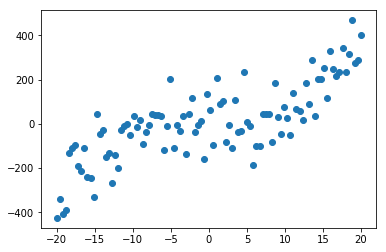

In [22]:
# Generate 100 points equally distanced from -20 to 20 and save them in a numpy array x.
x = np.linspace(-20,20,100)
#print(x)
# Create a new numpy array y defined as  𝑦𝑖=sin(𝑥𝑖)+0.05𝑥3𝑖+𝜀𝑖  where  𝜀𝑖∼(0,1002) , for  𝑖=1,...,100 .
Ei = stats.norm.rvs(size=100,loc = 0, scale = 100)
#print(Ei)
y = np.array([])
#for i,j in np.nditer([x,Ei]):
for i in range(len(x)):
    yi =  math.sin(x[i]) + 0.05 *(x[i]**3) + Ei[i]
    y = np.append(y,yi)
#scale y
#y = y/10
# Plot the scatter plot of x and y. Do you think that a linear model could fit this data?
plt.scatter(x,y)
plt.show()

Ans:
The scatter plot shows that the data increases linerly from x =-20 to -10.Then remains flat till the value x = 5 and finally increases from x = 5 to 20. 
from the scatter plot, it seems that there are two bends.Therefore, polynomial regression model will better fit for this data. Polynomial regression provides more flexibility in fitting curves from a broad range of nonlinear function. 

           x           y
0 -20.000000 -425.943715
1 -19.595960 -339.342347
2 -19.191919 -410.222014
3 -18.787879 -391.728613
4 -18.383838 -131.804598


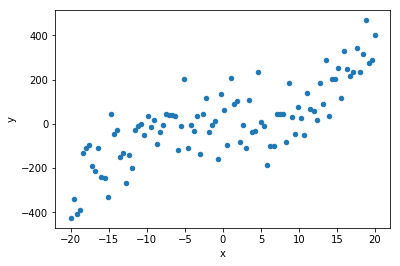

In [23]:
df = pd.DataFrame({'x':x, 'y':y})
print(df.head())
df.plot('x', 'y', kind='scatter')

In [24]:
#4.Fit a linear regression model and call it model1 :  𝑦=𝛽0+𝛽1𝑥  and add the fitted line over the scatter plot.
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X = x.reshape(-1, 1), y = y.reshape(-1,1))
print(model1.intercept_, model1.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

[10.76841295] [[11.41088833]]


Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'x vs y')

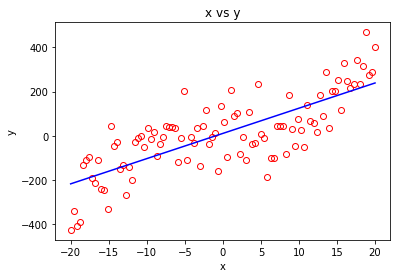

In [25]:
y_pred = model1.predict(x.reshape(-1, 1))
plt.plot(x, y, 'or', mfc='none')
plt.plot(x, y_pred, color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

In [26]:
#5.Compute the mean squared error of model1. Hint : You can use sklearn.metrics.mean_squared_error.
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y,y_pred))

12186.837766569432


In [27]:
#6.Fit a polynomial regression model with degree 5 and call it model2 :  𝑦=𝛽0+𝛽1𝑥+𝛽2𝑥2+...+𝛽5𝑥5 .
#Hint : You can use sklearn.preprocessing.PolynomialFeatures in order to create a new input array that includes  𝑥0 ,  𝑥1 ,  𝑥2 ,  𝑥3  ...
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
X5 = poly.fit_transform(x.reshape(-1,1))

model2 = LinearRegression()
model2.fit(X = X5, y = y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'x vs y')

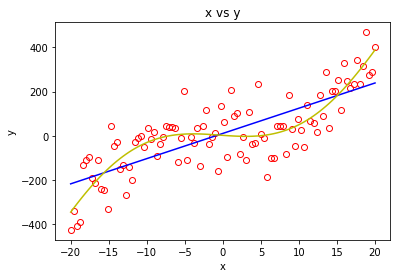

In [28]:
#7.Add the fitted curve over the scatter plot and compare model2 and model1.
y_pred_poly = model2.predict(X5)
plt.plot(x, y, 'or', mfc='none')
plt.plot(x, y_pred, color = 'b')
plt.plot(x, y_pred_poly, color = 'y')
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

In [29]:
#8.Compute the mean squared error of model2
print(mean_squared_error(y,y_pred_poly))

8282.596924243377


In [30]:
#9.Fit a polynomial regression model with degree 20 and call it model3 :  𝑦=𝛽0+𝛽1𝑥+𝛽2𝑥2+...+𝛽20𝑥20 .
from sklearn.preprocessing import PolynomialFeatures
poly1 = PolynomialFeatures(degree=20)
X20 = poly1.fit_transform(x.reshape(-1,1))

model3 = LinearRegression()
model3.fit(X = X20, y = y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'x vs y')

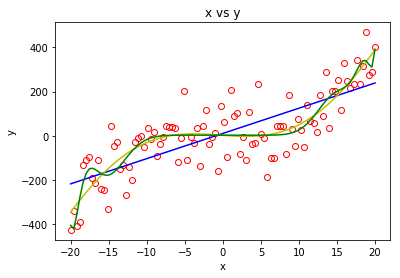

In [31]:
#10.Add the fitted curve over the scatter plot and compare the three models. 
y_pred_poly20 = model3.predict(X20)
plt.plot(x, y, 'or', mfc='none')
plt.plot(x, y_pred, color = 'b')
plt.plot(x, y_pred_poly, color = 'y')
plt.plot(x, y_pred_poly20, color = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

In [32]:
#What is the mean squared error of model3?
print(mean_squared_error(y,y_pred_poly20))

7650.695782780811


# Cross-Validation

In [33]:
#11.Using  10 -fold cross-validation, compute the averaged validation mean squared errors for all possible polynomial models by 
#varying the degree of the polynomial model from  1  to  20 .

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
X = df[['x']].values
k = 10
avgval_mse = np.array([])
deg_poly = np.array([])
for j in range(1,21):
    mse = np.zeros(k)
    kf = KFold(n_splits=k, shuffle=True)
    i = 0
    for train_i, test_i in kf.split(df):
        poly1 = PolynomialFeatures(degree=j)
        X_train = poly1.fit_transform(X[train_i])
        X_test = poly1.fit_transform(X[test_i])
        lr = LinearRegression() 
        lr = lr.fit(X_train, y[train_i])    
        mse[i]=np.mean((lr.predict(X_test) - y[test_i])**2)
        i += 1
    avgval_mse = np.append(avgval_mse, np.mean(mse))
    deg_poly = np.append(deg_poly,j)
    print("averaged validation mean squared errors for polynomial of degree ",j,": ", np.mean(mse))
#mse = np.array([])
#mse = np.append(mse,mean_squared_error(y[test_i],lr.predict(X[test_i])) 

averaged validation mean squared errors for polynomial of degree  1 :  12907.103142667944
averaged validation mean squared errors for polynomial of degree  2 :  13207.606817489683
averaged validation mean squared errors for polynomial of degree  3 :  8809.443956928064
averaged validation mean squared errors for polynomial of degree  4 :  9576.652454124274
averaged validation mean squared errors for polynomial of degree  5 :  9964.318086309804
averaged validation mean squared errors for polynomial of degree  6 :  9206.207609280023
averaged validation mean squared errors for polynomial of degree  7 :  9351.757685077238
averaged validation mean squared errors for polynomial of degree  8 :  10028.61659997638
averaged validation mean squared errors for polynomial of degree  9 :  9965.457883700541
averaged validation mean squared errors for polynomial of degree  10 :  10108.91102222809
averaged validation mean squared errors for polynomial of degree  11 :  10135.48504583318
averaged validati

Text(0.5, 0, 'degree of the polynomial model')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'degree of the polynomial model vs MSE')

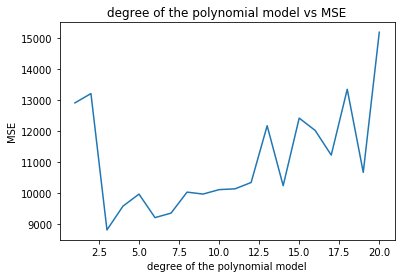

In [34]:
#12.Plot the averaged validation MSE with respect to the degree of the model. 
# Hint :  𝑥 -axis is defined as the degree of the polynomial model, i.e.,  1,2,3,...,20  and  𝑦 -axis is its associated MSE.
plt.plot(deg_poly, avgval_mse)
plt.xlabel('degree of the polynomial model')
plt.ylabel('MSE')
plt.title('degree of the polynomial model vs MSE')

# LASSO

In [35]:
#13.Using  10 -fold cross-validation and the LASSO regularization, fit the polynomial model with degree 20 and call it model4.
#What is the best regularization constant? Show it in a curve. Hint : Here, you need to apply the  10 -fold cross-validation 
#over a sequence of regularization constants. The figure will show you what is the best regularization constant, 
#based on MSE or  𝑅2 .
poly20 = PolynomialFeatures(degree=20)
X_20 = poly20.fit_transform(x.reshape(-1,1))

from sklearn.linear_model import LassoCV
alpha_values = np.linspace(0.003, 0.05, num= 100)
import matplotlib.pyplot as plt
#alpha_values = np.linspace(0, 1, num= 100)
model4 = LassoCV(alphas = alpha_values, cv = 10, normalize = True)
model4.fit(X_20,y)

C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase t

LassoCV(alphas=array([0.003  , 0.00347, ..., 0.04953, 0.05   ]), copy_X=True,
    cv=10, eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=None, normalize=True, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

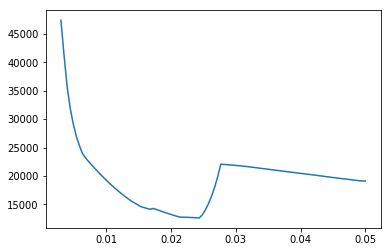

In [36]:
cv_values = np.mean(model4.mse_path_, axis=1)
alpha_values = model4.alphas_
plt.plot(alpha_values, cv_values);

In [37]:
#14.Based on the LASSO model, what is the best final model? Hint : Once you have chosen the best regularization constant,
#you can extract the associated coefficients.
print("Best regularization parameter:", model4.alpha_)
print("Coefficients are:", model4.coef_)

Best regularization parameter: 0.02436363636363636
Coefficients are: [ 0.00000000e+00 -1.80470797e+00 -1.83385004e-01  6.19640652e-02
  8.62381130e-04 -0.00000000e+00  1.21135124e-06 -1.85966610e-08
  0.00000000e+00 -3.88875804e-10 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -2.90632260e-19  0.00000000e+00 -1.42462421e-23  3.19684360e-23
 -0.00000000e+00]


We can consider the non-zero coefficient to make best final model